In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import regression as reg
import matplotlib.pyplot as plt

In [2]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[range(16)]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y/1e6
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 17), y_train: (17277, 1)
X_test: (4320, 17), y_train: (4320, 1)


In [4]:
import matplotlib.pyplot as plt

def plot_data(lm: reg.RegressionOpt):
    plt.plot(range(len(lm.loss_func_list)), lm.loss_func_list)
    plt.title(f'Loss function', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

    plt.plot(range(len(lm.grad_norm_list)), lm.grad_norm_list)
    plt.title(f'Gradient norm', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

In [5]:
def save_data(lm: reg.RegressionOpt):
    d = {
        'loss_func_list': lm.loss_func_list,
        'grad_norm_list': lm.grad_norm_list
    }

    df = pd.DataFrame(data=d)

    file_name = 'lf_n_grn_' + str(lm.solver) + '_' + str(lm.step_size) + '.csv'
    df.to_csv('../data/output/' + file_name, index=False)

In [6]:
w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))

GD method

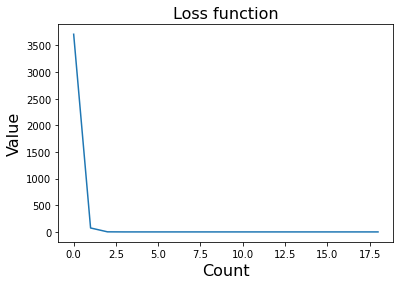

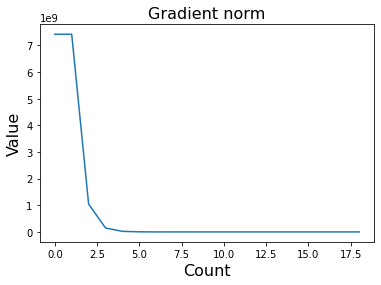

count: 18, gradient norm: 2.574921202780232e-05, loss func: 1.49028845883276e-20


In [40]:
lm = reg.RegressionOpt(
    solver='gd',
    max_iter=500,
    w=w_init,
    step_size=2e-12,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

w = lm.fit_gd()

plot_data(lm)

# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Newton method

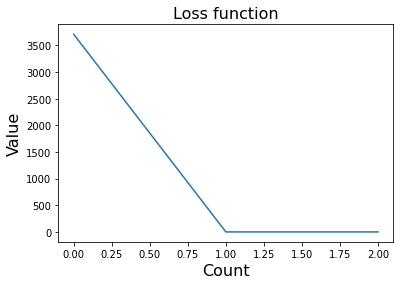

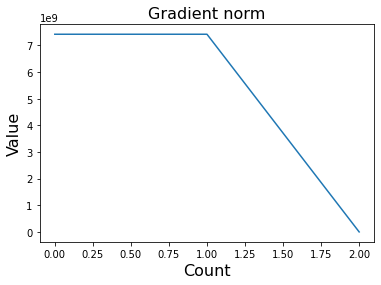

count: 2, gradient norm: 1.3645380800150865e-12, loss func: 4.9002225110025143e-26


In [41]:
lm = reg.RegressionOpt(
    solver='newton',
    max_iter=500,
    step_size=1,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_newton()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)
# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Accelerated GD method

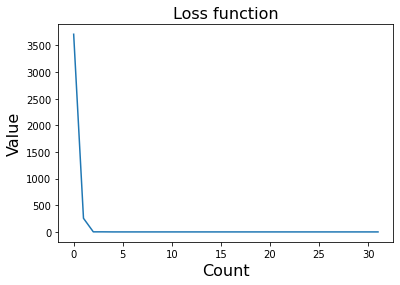

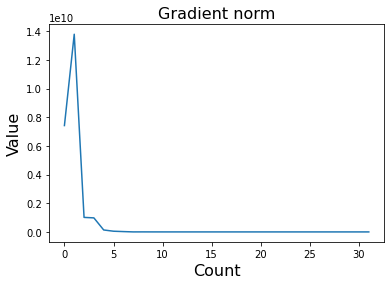

count: 32, gradient norm: 9.538231946597232e-07, loss func: 1.490289920953216e-20


In [42]:
import regression as reg

lm = reg.RegressionOpt(
    solver='agd',
    max_iter=500,
    step_size=2e-12,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_acc_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)
# save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

GD with backtracking

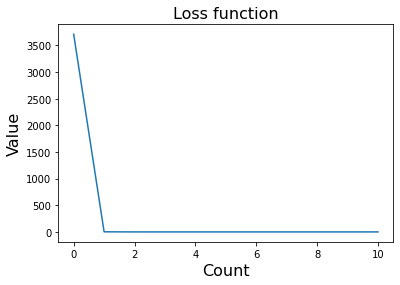

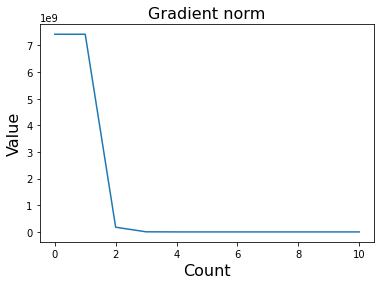

count: 10, inner_count: 10, gradient norm: 1.811981981933273e-05, loss func: 1.4902890626938134e-20


In [43]:
import regression as reg

lm = reg.RegressionOpt(
    backtracking=True,
    max_iter=500,
    step_size=10,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

print(f'count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}, loss func: {lm.loss_func_list[-1]}')

Accelerated GD with backtracking

In [44]:
import regression as reg

t = [4e-13]
for i in range(25):
    t.append(1.01 * t[i])

# print(t)

for step in t:
    lm = reg.RegressionOpt(
        backtracking=True,
        max_iter=500,
        step_size=step,
        alpha=0.5,
        beta=0.5,
        w=w_init,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        terminate=True
    )

    lm.fit_acc_gd()
    # plot_data(lm)

    print(f'step size: {step}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

step size: 4e-13, count: 500, gradient norm: 0.014611244201664384, loss function: 2.4773806727410497e-20
step size: 4.04e-13, count: 500, gradient norm: 0.02882003784181995, loss function: 5.3147279671159234e-20
step size: 4.0804e-13, count: 500, gradient norm: 0.16814327240015312, loss function: 1.3112317109272397e-18
step size: 4.121204e-13, count: 500, gradient norm: 0.014251708984438479, loss function: 2.858922990835296e-20
step size: 4.16241604e-13, count: 500, gradient norm: 0.012295722961487593, loss function: 2.177791746549761e-20
step size: 4.2040402004e-13, count: 500, gradient norm: 0.0015163421631523072, loss function: 1.5057735625109497e-20
step size: 4.246080602404e-13, count: 500, gradient norm: 0.010037422180176826, loss function: 2.169158759396673e-20
step size: 4.2885414084280397e-13, count: 500, gradient norm: 0.013232231140139663, loss function: 2.275684843737155e-20
step size: 4.33142682251232e-13, count: 500, gradient norm: 0.00428295135499095, loss function: 1.57

In [46]:
lm = reg.RegressionOpt(
    solver='agd_bt',
    backtracking=True,
    max_iter=500,
    step_size=5.129727980068933e-13,
    alpha=0.5,
    beta=0.5,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=True
)

lm.fit_acc_gd()
# plot_data(lm)
save_data(lm)

print(f'step size: {lm.step_size}, count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}, loss function: {lm.loss_func_list[-1]}')

step size: 5.129727980068933e-13, count: 474, gradient norm: 7.915497002597948e-05, loss function: 1.4903180965936572e-20


In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

train score: 1.0
test score: 1.0
